In [42]:
!pip install --upgrade git+https://bitbucket.org/freemens/ion_sdk.git@master    
%env ALTERGO_FACTORY_API = https://staging.altergo.io/
%env ALTERGO_IOT_API = https://iot.staging.altergo.io/   

  Cloning https://bitbucket.org/freemens/ion_sdk.git (to revision master) to c:\users\gcoll\appdata\local\temp\pip-req-build-jhzfxfsz
env: ALTERGO_FACTORY_API=https://staging.altergo.io/
env: ALTERGO_IOT_API=https://iot.staging.altergo.io/


  Running command git clone -q https://bitbucket.org/freemens/ion_sdk.git 'C:\Users\gcoll\AppData\Local\Temp\pip-req-build-jhzfxfsz'


In [50]:
import pandas as pd

import matplotlib.pyplot as plt
import ion_sdk.edison_api.edison_api as eapi
import datetime
from ion_sdk.edison_api.models.factoryModel import EdisonGenericComponent, Model,CurrentState

edApi=eapi.Client("f6ad4f7166814976b66b9cb346ebc5dd")


In [56]:
from datetime import timedelta

In [79]:
values = [0.50,
0.38,
0.25,
0.25,
0.25,
0.25,
0.38,
0.63,
0.75,
0.88,
0.75,
0.63,
0.63,
0.63,
0.50,
0.63,
0.63,
0.63,
0.63,
0.75,
0.88,
1.00,
0.88,
0.63]

startDate = datetime.datetime(2020,1,1,00,00,00)

list = []
currentDate = startDate
for i in range(365):
    for j in range (24):
        list.append([currentDate,values[j]])
        currentDate = currentDate + timedelta(hours=1)
    

        
data = pd.DataFrame(list, columns =['date', 'power'])
print(data)

                    date  power
0    2020-01-01 00:00:00   0.50
1    2020-01-01 01:00:00   0.38
2    2020-01-01 02:00:00   0.25
3    2020-01-01 03:00:00   0.25
4    2020-01-01 04:00:00   0.25
...                  ...    ...
8755 2020-12-30 19:00:00   0.75
8756 2020-12-30 20:00:00   0.88
8757 2020-12-30 21:00:00   1.00
8758 2020-12-30 22:00:00   0.88
8759 2020-12-30 23:00:00   0.63

[8760 rows x 2 columns]


In [80]:
print(data)

                    date  power
0    2020-01-01 00:00:00   0.50
1    2020-01-01 01:00:00   0.38
2    2020-01-01 02:00:00   0.25
3    2020-01-01 03:00:00   0.25
4    2020-01-01 04:00:00   0.25
...                  ...    ...
8755 2020-12-30 19:00:00   0.75
8756 2020-12-30 20:00:00   0.88
8757 2020-12-30 21:00:00   1.00
8758 2020-12-30 22:00:00   0.88
8759 2020-12-30 23:00:00   0.63

[8760 rows x 2 columns]


In [81]:
data['date'] = pd.to_datetime(data['date'])
data=data.set_index('date')

In [82]:
data['power'] = data['power'] * 50000

In [83]:
print(data)

                       power
date                        
2020-01-01 00:00:00  25000.0
2020-01-01 01:00:00  19000.0
2020-01-01 02:00:00  12500.0
2020-01-01 03:00:00  12500.0
2020-01-01 04:00:00  12500.0
...                      ...
2020-12-30 19:00:00  37500.0
2020-12-30 20:00:00  44000.0
2020-12-30 21:00:00  50000.0
2020-12-30 22:00:00  44000.0
2020-12-30 23:00:00  31500.0

[8760 rows x 1 columns]


In [84]:

serial = "loudeac"
asset=edApi.getAsset(serial)
print(asset)


EdisonComponent(id=321, serial_number='Loudeac', iot_data=IotData(id=258, last_update=Datetime(date=datetime.datetime(2021, 10, 15, 0, 0), timezone_type=3, timezone='UTC'), shadow='{"totalCount":7241,"needRefresh":false,"refreshObj":[],"_id":"616fcf3cd4802700223a9ca5","sensorStatistics":[{"_id":"616fcf3cd4802700223a9ca6","componentId":321,"sensorId":13,"sensorCode":"twq","sensorPosition":"0","lastUpdate":1634256000000,"lastValue":0.5,"firstUpdate":1633564800000,"firstValue":0.5,"count":153,"createdAt":"2021-10-20T08:11:40.786Z","updatedAt":"2021-10-20T08:11:40.786Z"},{"_id":"61894d0fd2c432001c867af0","componentId":321,"sensorId":23,"sensorCode":"aXV","sensorPosition":"0","lastUpdate":1634256000000,"lastValue":25000,"firstUpdate":1577836800000,"firstValue":25000,"count":7088,"createdAt":"2021-11-08T16:15:11.873Z","updatedAt":"2021-11-09T15:31:09.949Z"}],"componentId":321,"serialNumber":"Loudeac","lastUpdate":1634256000000,"firstUpdate":1577836800000,"createdAt":"2021-10-20T08:11:40.786Z

In [85]:

uploadSensorList=edApi.refactorDataframeToAsset(data,asset)
asset.df=data
edApi.updateSensorDataByFile(asset,uploadSensorList)


('Power', 100)

Preparing payload
Payload sent successfully! Checkout: https://staging.altergo.io/core/iot/connected_component/view/321/graph


In [86]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:xlabel='date'>

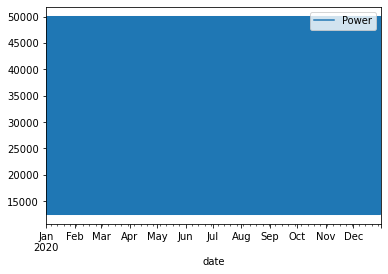

In [87]:
data.plot()